In [1]:
import numpy as np
import matplotlib.pyplot as plt
import comp_module as cm
import opt_algos as oa

In [60]:
def ljpot(r):
    eps = 4.0
    sigm = 2.5
    a = (sigm / r)**2
    return 4 * eps * (a**6 - a**3)

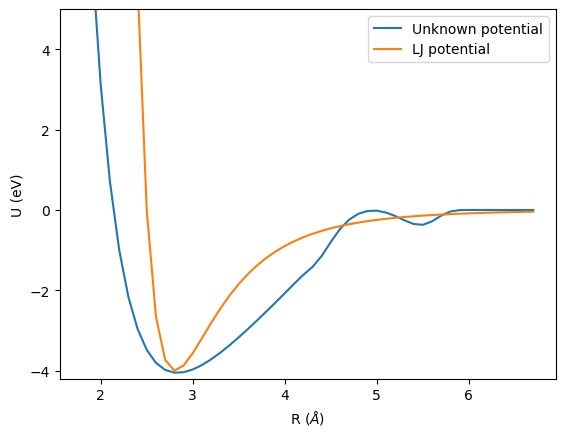

In [62]:
pair_pot = np.loadtxt("lmp_runs/Lead_dimer_data/pe_r_dimer.txt", skiprows=1)

plt.plot(pair_pot[:, 0], pair_pot[:, 1], label="Unknown potential")
plt.plot(pair_pot[:, 0], ljpot(pair_pot[:, 0]), label="LJ potential")
plt.ylim([-4.2, 5.0])
plt.xlabel(r"R ($\AA$)")
plt.ylabel("U (eV)")
plt.legend()

In [2]:
str_valid  = cm.Structure.read_from_dump("lmp_runs/Lead_liquid_data/dump.Lead.40000")

In [8]:
eps_arr = np.linspace(0.0, 4.0, 41)
sigm_arr = np.linspace(2.0, 4.0, 21)

f_rmse_arr = []

for eps in eps_arr:
    temp_arr = []
    for sigm in sigm_arr:
        temp_arr.append(cm.forces_rmse(structure=str_valid, eps=eps, sigma=sigm))
    f_rmse_arr.append(temp_arr)

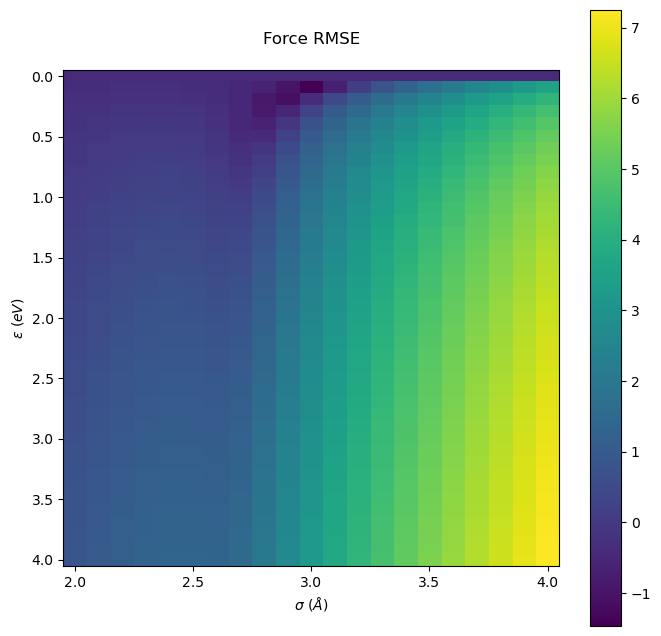

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(np.log(np.array(f_rmse_arr)), label="Force RMSE")

nevery=5
xticks = np.arange(len(sigm_arr))[::nevery]
xtick_labels = [f'{x:1.1f}' for x in sigm_arr[::nevery]]
yticks = np.arange(len(eps_arr))[::nevery]
ytick_labels = [f'{x:1.1f}' for x in eps_arr[::nevery]]
ax.set_xticks(xticks, labels=xtick_labels)
ax.set_yticks(yticks, labels=ytick_labels)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("", rotation=90, va="bottom")

ax.set_xlabel(r"$\sigma~(\AA)$")
ax.set_ylabel(r"$\varepsilon~(eV)$")
ax.set_title("Force RMSE\n")
ax.set_aspect(len(sigm_arr) / len(eps_arr))


In [3]:
def f_loss_func(params):
    return cm.forces_rmse(structure=str_valid, eps=params[0], sigma=params[1], rcut=6.0)

In [14]:
params_arr = oa.pseudo_gradient(f_loss_func, np.array([2.0, 3.5]), np.array([[0.01, 3.0], [2.0, 4.0]]), n_iter=300)

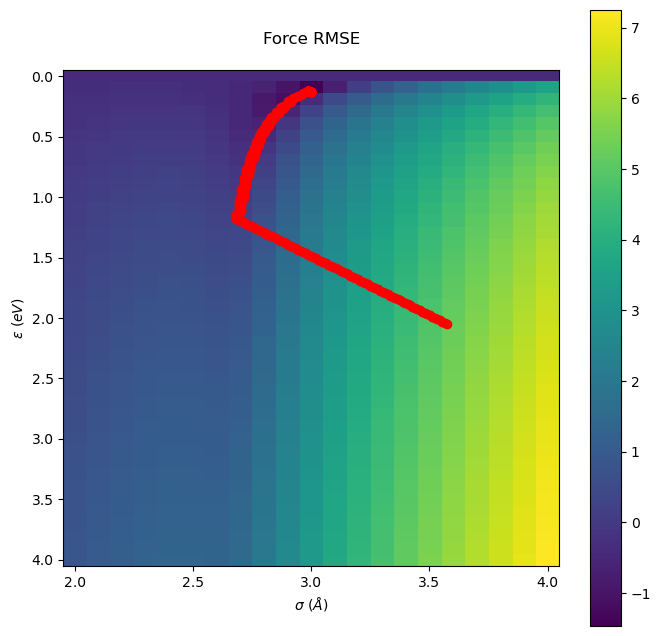

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(np.log(np.array(f_rmse_arr)), label="Force RMSE")

nevery=5
xticks = np.arange(len(sigm_arr))[::nevery]
xtick_labels = [f'{x:1.1f}' for x in sigm_arr[::nevery]]
yticks = np.arange(len(eps_arr))[::nevery]
ytick_labels = [f'{x:1.1f}' for x in eps_arr[::nevery]]
ax.set_xticks(xticks, labels=xtick_labels)
ax.set_yticks(yticks, labels=ytick_labels)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("", rotation=90, va="bottom")

ax.set_xlabel(r"$\sigma~(\AA)$")
ax.set_ylabel(r"$\varepsilon~(eV)$")
ax.set_title("Force RMSE\n")
ax.set_aspect(len(sigm_arr) / len(eps_arr))

grad_eps = (np.array(params_arr)[:, 0] - min(eps_arr)) / (max(eps_arr - min(eps_arr))) * len(eps_arr)
grad_sigm = (np.array(params_arr)[:, 1] - min(sigm_arr)) / (max(sigm_arr - min(sigm_arr))) * len(sigm_arr)
plt.plot(grad_sigm, grad_eps, 'ro')

In [37]:
print(f"Eps = {params_arr[-1][0]:.2f} eV\nSigma = {params_arr[-1][1]:.2f} A")

Eps = 0.12 eV
Sigma = 2.94 A


In [2]:
x = np.linspace(0.0, 10.0, 1000)

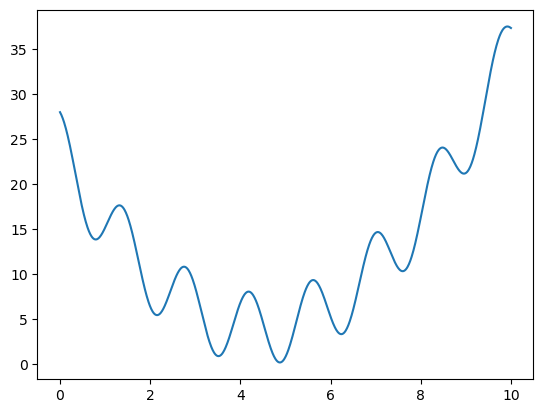

In [3]:
a = 4.5
f = lambda x: 4 * np.cos(a*x) + 0.05 * (a*x)**2 - 2*(a*x) + 24
plt.plot(x, f(x))

In [63]:
params_arr = oa.pseudo_gradient(f, np.array([8.3]), borders=np.array([[0.0, 10.0]]), n_iter=100)

NameError: name 'f' is not defined

In [64]:
plt.plot(x, f(x))
plt.plot(params_arr, f(np.array(params_arr)), 'ro')
plt.show()

NameError: name 'x' is not defined

# Simulated annealing

In [5]:
params_arr, acc_arr = oa.simulated_annealing(f,np.array([8.0]), np.array([[0.0, 10.0]]), n_iter=500, Tinit=1.0, step_size=0.8)

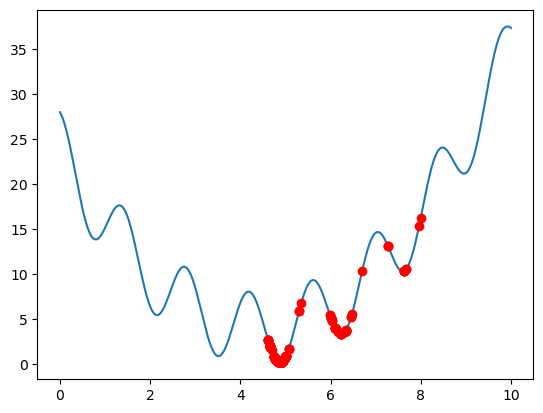

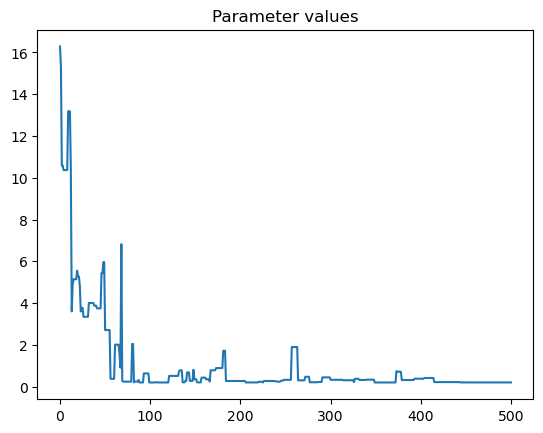

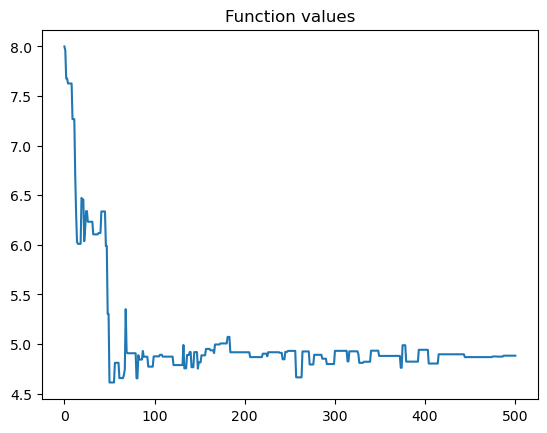

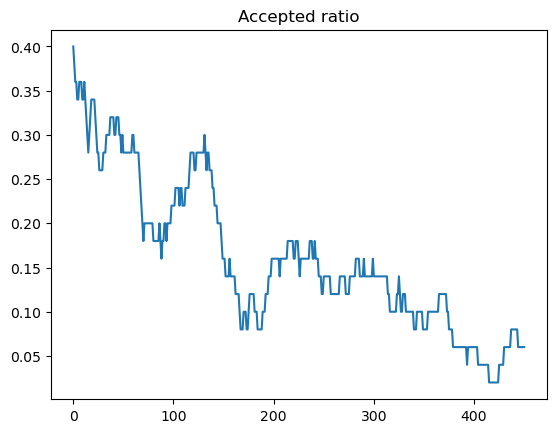

In [6]:
plt.plot(x, f(x))
plt.plot(params_arr, f(np.array(params_arr)), 'ro')
plt.show()

plt.plot(f(np.array(params_arr)))
plt.title("Parameter values")
plt.show()

plt.plot(params_arr)
plt.title("Function values")
plt.show()

plt.plot([(acc_arr[i+50] - acc_arr[i]) / 50 for i in range(len(acc_arr)-50)])
plt.title("Accepted ratio")
plt.show()

# Differentail Evolution

In [51]:
res = np.array(list(oa.diff_evo(f, bounds=[[0, 10]], popsize=4, n_iter=200)))
# params, loss

Text(0.5, 0, 'Population number')

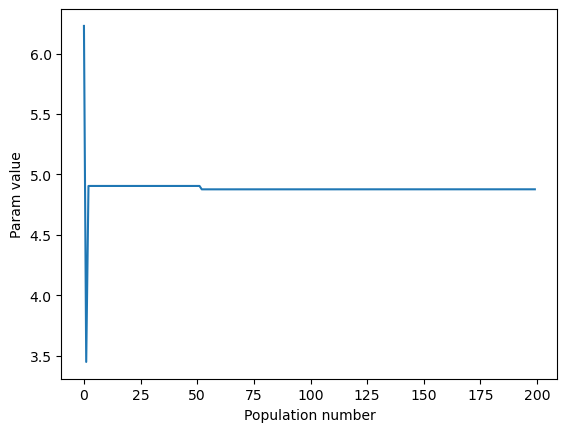

In [52]:
# We plot just the best item
plt.plot(res[:, 0])
plt.ylabel("Param value")
plt.xlabel("Population number")

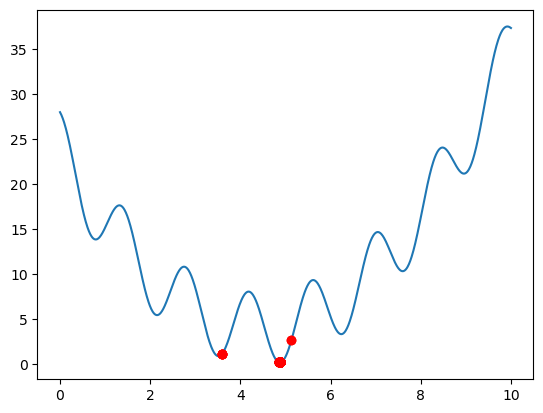

In [50]:
plt.plot(x, f(x))
plt.plot(res[:, 0], f(res[:, 0]), 'ro')
plt.show()